In [3]:
# 第 1 步：匯入會用到的套件

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [6]:
# 第 2 步：讀取資料

file_path = "/content/drive/MyDrive/Colab Notebooks/Vibe Coding/data/Real estate.csv"  # 請依實際路徑調整
df = pd.read_csv(file_path)

# 查看前幾筆資料
df.head()

# 查看資料的基本資訊（欄位型態、缺失值等）
df.info()

# 查看各數值欄位的基本統計量
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
# 第 3 步：幫欄位加上註解（自己看用，實際分析不一定要改欄名）

column_desc = {
    "No": "編號",
    "X1 transaction date": "交易日期",
    "X2 house age": "屋齡（年）",
    "X3 distance to the nearest MRT station": "距離最近捷運站距離（公尺）",
    "X4 number of convenience stores": "附近便利商店數量",
    "X5 latitude": "緯度",
    "X6 longitude": "經度",
    "Y house price of unit area": "每坪單價"
}

column_desc


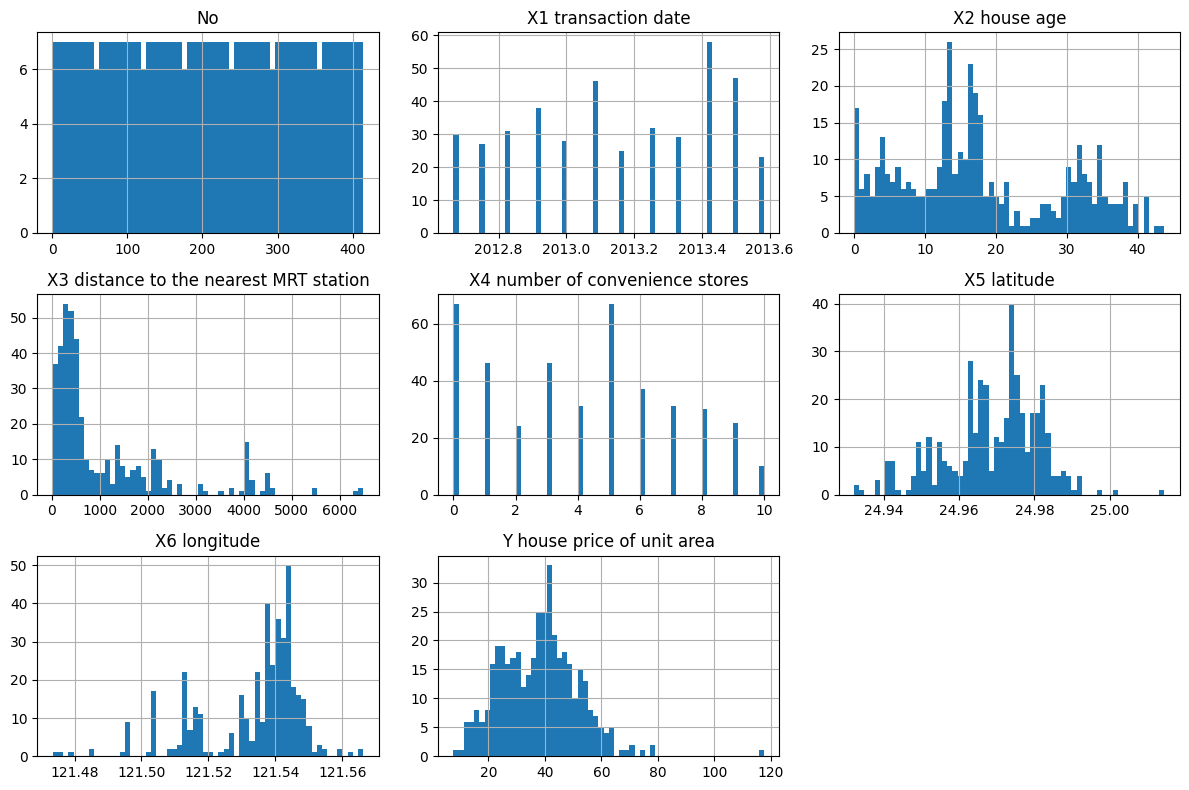

In [7]:
# 使用 DataFrame 內的所有數值欄位繪製直方圖
# bins=30 表示每個直方圖會分成 30 個區間
# figsize=(12, 8) 設定整張圖的大小（寬 12、 高 8）
df.hist(bins=60, figsize=(12, 8))

# 自動調整子圖間距，避免標籤或圖形重疊
plt.tight_layout()

# 顯示所有繪製的圖形
plt.show()


In [8]:
# 計算相關係數矩陣
corr = df.corr()

corr


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


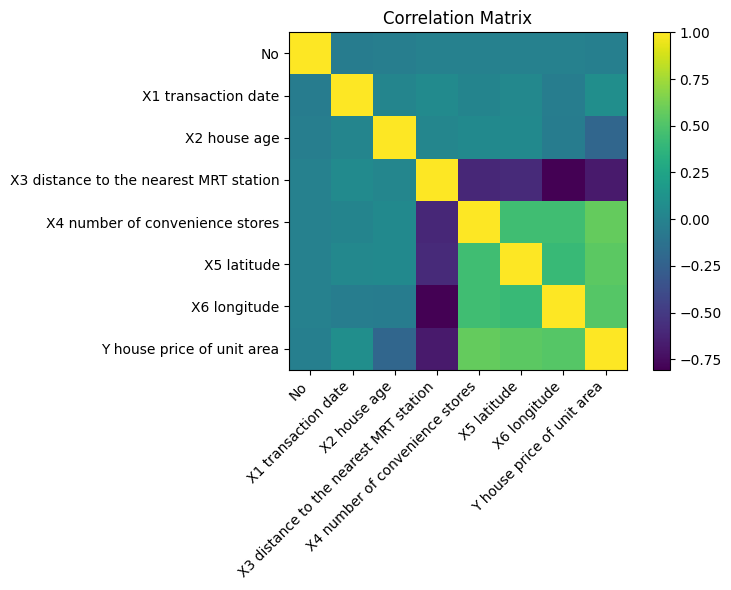

In [9]:
# 簡易畫出相關係數矩陣（不用 seaborn 的版本）

# 建立一個新的圖形畫布，並設定圖形大小為 8x6
plt.figure(figsize=(8, 6))

# 使用 imshow 將相關係數矩陣 (corr) 以顏色影像方式呈現
# interpolation="nearest" 表示使用最近鄰插值，使格子邊界更清楚
plt.imshow(corr, interpolation="nearest")

# 顯示右側的顏色條（colorbar），用來對照顏色與數值（相關係數）的對應關係
plt.colorbar()

# 設定 x 軸刻度的位置與標籤為 corr 的欄位名稱
# rotation=45 讓標籤旋轉 45 度以避免重疊
# ha="right" 將文字靠右對齊使標籤更易閱讀
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")

# 設定 y 軸刻度的位置與標籤為 corr 的欄位名稱
plt.yticks(range(len(corr.columns)), corr.columns)

# 設定圖表標題為 "Correlation Matrix"
plt.title("Correlation Matrix")

# 自動調整整體布局，避免文字或圖形重疊
plt.tight_layout()

# 顯示圖表
plt.show()



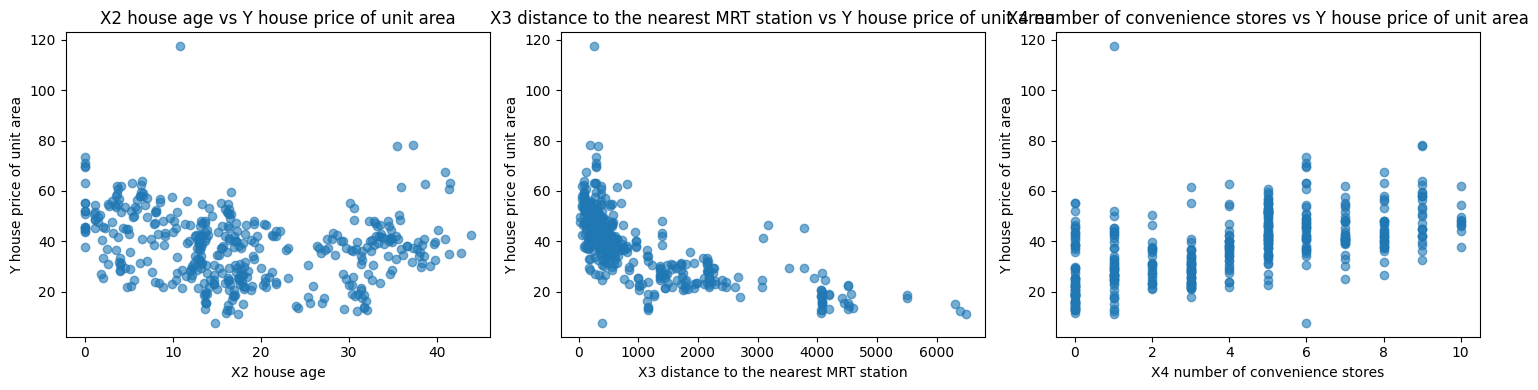

In [10]:
# 第 5 步：畫幾個自變數 vs 房價的散佈圖

target_col = "Y house price of unit area"
feature_cols_to_plot = [
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores"
]

plt.figure(figsize=(15, 4))

for i, col in enumerate(feature_cols_to_plot, 1):
    plt.subplot(1, len(feature_cols_to_plot), i)
    plt.scatter(df[col], df[target_col], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()


In [11]:
# 第 6 步：定義特徵 X 和 目標 y

feature_cols = [
    "X1 transaction date",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude"
]

X = df[feature_cols]
y = df[target_col]

X.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [12]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [14]:
# 第 7 步：切分訓練集與測試集（例如測試集佔 20%）

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # 為了結果可重現
)

X_train.shape, X_test.shape


((331, 6), (83, 6))

In [15]:
X_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,2013.167,43.8,57.58945,7,24.96750,121.54069
234,2013.250,8.0,2216.61200,4,24.96007,121.51361
5,2012.667,7.1,2175.03000,3,24.96305,121.51254
45,2013.083,36.6,488.81930,8,24.97015,121.54494
245,2013.417,7.5,639.61980,5,24.97258,121.54814


In [16]:
# 第 8 步：建立模型並訓練（fit）

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# 第 9 步：在測試資料上做預測

y_pred = model.predict(X_test)

# 計算 R^2, MAE, MSE, RMSE 等指標

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R^2  : {r2:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")


R^2  : 0.681
MAE  : 5.305
MSE  : 53.506
RMSE : 7.315


In [18]:
# 第 10 步：把每個特徵對應的迴歸係數列出來

coeff_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": model.coef_
})

intercept = model.intercept_

coeff_df, intercept

# 為了好看一點，可以依照係數大小排序

coeff_df_sorted = coeff_df.sort_values(by="coefficient", ascending=False)
coeff_df_sorted


,feature,coefficient
4,X5 latitude,229.043054
0,X1 transaction date,5.440742
3,X4 number of convenience stores,1.091425
2,X3 distance to the nearest MRT station,-0.004759
1,X2 house age,-0.270791
5,X6 longitude,-29.492591


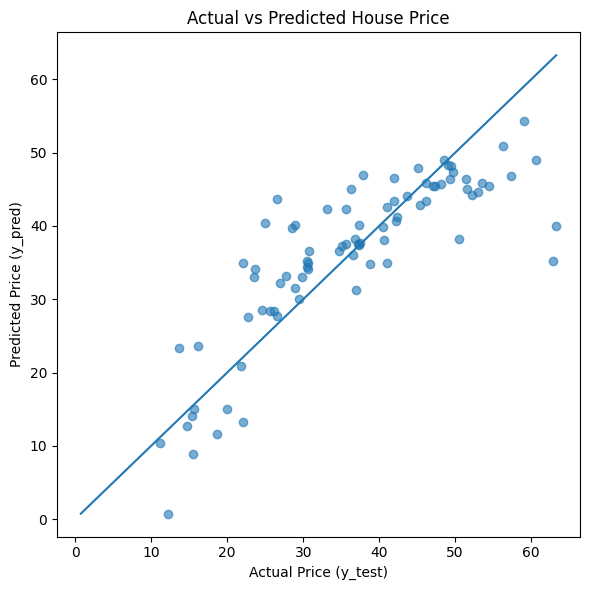

In [19]:
# 第 11 步：畫實際房價 vs 預測房價

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted House Price")

# 畫一條 y = x 參考線
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.tight_layout()
plt.show()


In [20]:
# 第 12 步：示範如何預測一筆新的資料
# 注意：數值要合理地落在訓練資料範圍附近

new_data = pd.DataFrame({
    "X1 transaction date": [2013.5],
    "X2 house age": [10],
    "X3 distance to the nearest MRT station": [300],
    "X4 number of convenience stores": [8],
    "X5 latitude": [24.98],
    "X6 longitude": [121.54]
})

pred_price = model.predict(new_data)
print("預測的每坪單價：", pred_price[0])


預測的每坪單價： 52.263708235343074
